In [349]:
# IMPORTING PANDAS
import pandas as pd

# IMPORTING NUMPY
import numpy as np

# IMPORTING MATPLOTLIB
import matplotlib.pyplot as plt

# IMPORTING SEABORN
import seaborn as sns

# CREATING INLINE FIGURES
%matplotlib inline

In [350]:
data = pd.read_csv('Datasets/Pre-Processed-Data.csv.')

In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   METALLOGEN         432 non-null    object 
 1   LOCALITY           432 non-null    object 
 2   STATE              432 non-null    object 
 3   TOPOSHEET          432 non-null    object 
 4   MINERAL_OR         432 non-null    object 
 5   HOSTROCK_TYPE1     430 non-null    object 
 6   HOSTROCK_TYPE2     430 non-null    object 
 7   HOSTROCK_TYPE3     432 non-null    object 
 8   HOSTROCK_TYPE4     432 non-null    object 
 9   MORPH-STRATABOUND  432 non-null    int64  
 10  MORPH-SEDIMENTARY  432 non-null    int64  
 11  MORPH-BEDDED       432 non-null    int64  
 12  MORPH-SHEAR        432 non-null    int64  
 13  MORPH-CONCORDANT   432 non-null    int64  
 14  MORPH-DISCORDANT   432 non-null    int64  
 15  MORPH-LENSOID      432 non-null    int64  
 16  MORPH-RESIDUAL     432 non

In [352]:
data.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,EASTERN GHAT BELT,BAGHDAPA,ORISSA,73 C,Be,PEGMATITE IN GRANULITE,-,-,-,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,SARGIPALLI BELT,SARGIPALLI,ORISSA,64 N,Pb,GARNETIFEROUS MICA SCHIST,-,-,-,1,...,0,0,0,0,1,0,0,0,0,2.63
2,RORO-JOJOHATU BELT,"RORO,JOJOHATU",JHARKHAND,73,Cr,ULTRAMAFIC SUIT,-,-,-,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,BONAI-NOAMUNDI-JAMDA BELT,ITAR-BALIJODI,ORISSA,73,Fe-Hematite,BHQ,SHALE INTERLAYERED WITH LAVA,-,-,0,...,0,0,0,0,0,0,0,1,0,3.00
4,BONAI-NOAMUNDI-JAMDA BELT,MERALGORA,JHARKHAND,73,Fe-Hematite,BHQ,SHALE,BHQ,-,0,...,0,0,0,0,0,0,0,1,0,1.50


In [353]:
from sklearn.preprocessing import LabelEncoder

In [354]:
LE = LabelEncoder()
data['METALLOGEN'] = LE.fit_transform(data['METALLOGEN'])
data['LOCALITY'] = LE.fit_transform(data['LOCALITY'])
data['STATE'] =  LE.fit_transform(data['STATE'])
data['TOPOSHEET'] = LE.fit_transform(data['TOPOSHEET'])
data['HOSTROCK_TYPE1'] = LE.fit_transform(data['HOSTROCK_TYPE1'])
data['HOSTROCK_TYPE2'] = LE.fit_transform(data['HOSTROCK_TYPE2'])
data['HOSTROCK_TYPE3'] = LE.fit_transform(data['HOSTROCK_TYPE3'])
data['HOSTROCK_TYPE4'] = LE.fit_transform(data['HOSTROCK_TYPE4'])
data['MINERAL_OR'] = LE.fit_transform(data['MINERAL_OR'])


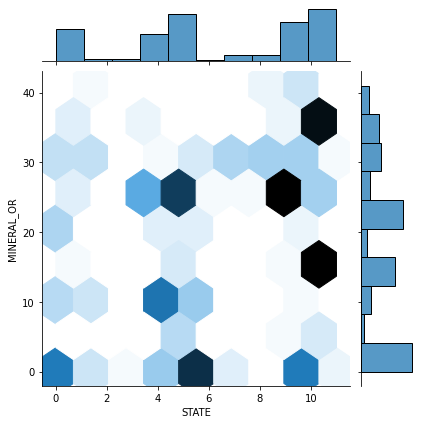

In [355]:
sns.jointplot(x="STATE",y="MINERAL_OR",data=data,kind='hex')

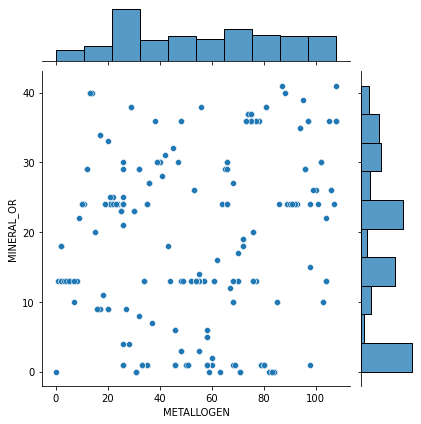

In [356]:
sns.jointplot(x="METALLOGEN",y="MINERAL_OR",data=data,kind='scatter')

In [357]:
len(data['METALLOGEN'].unique())

109

In [358]:
data.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.50


In [359]:
data["MINERAL_OR"].max()

41

In [360]:
# BALANCING THE DATA FOR CLASSIFICATION
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#print(Counter(data["MINERAL_OR"]))

In [361]:
mineral_labels = {'Fe-Hematite': 24, 'Cu': 13, 'Au': 1, 'Al-Bauxite': 0, 'Pb-Zn': 36, 'Mn': 29, 'Mn-Fe': 30, 'Cr': 10, 'Fe-Ti-V': 27, 'Be-Nb-Ta': 9, 'Cu-Pb': 18, 'Cu-Zn': 23, 'Fe-Magnetite': 26, 'WO3': 40, 'Pb-Zn-Cu': 38, 'Pb-Zn-Ag': 37, 'Fe-Hematite-Mn': 25, 'Cu-Pb-Zn': 20, 'Au-W': 6, 'Au-Cu': 3, 'Pb': 35, 'Nb-Ta-Li-Sn': 34, 'Au-Mo': 5, 'Cu-Pb-Ba': 19, 'Cu-U': 12, 'Zn': 41, 'Au-Cu-Zn': 4, 'Cu-Pb-Zn-Sb-Py': 21, 'Be': 8, 'Cr-PGE': 11, 'U': 39, 'Cs': 12, 'Nb-Ta': 33, 'Cu-Ni': 17, 'Mo-U-Cu': 32, 'Cu-Co': 14, 'Cu-Mo-Au': 16, 'Au-Ag-Cu-Pb-Zn': 2, 'Ma': 28, 'Mo': 31, 'Cu-Fe-Ti-V': 15, 'Ba': 7}

In [362]:
ros=RandomOverSampler()
X,Y=ros.fit_resample(data,data["MINERAL_OR"])
#print(Counter(Y))

In [363]:
X.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.50


In [364]:
len(X)

3318

X also contains RESERVE_AMT

# CLASSIFICATION MODEL

In [365]:
from sklearn.model_selection import train_test_split

In [366]:
from sklearn.metrics import classification_report

# ANN

In [367]:
X

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.000
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.630
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.000
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.000
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3314,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3315,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3316,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987


In [368]:
X["MINERAL_OR"].nunique()

42

In [369]:
# Output LAyers =42
# Multiclass Classification - Softmax activation function

In [370]:
x = X.drop(["MINERAL_OR","RESERVE_AMT"],axis=1).values
y = X["MINERAL_OR"].values

In [371]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [372]:
from sklearn.preprocessing import MinMaxScaler

In [373]:
scaler = MinMaxScaler()

In [374]:
x_train = scaler.fit_transform(x_train)

In [375]:
x_test = scaler.transform(x_test)

In [376]:
import tensorflow as tf
input_shape = x_train.shape

In [377]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten)
model.add(tf.keras.layers.Dense(units=200,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=42,activation='softmax'))

In [378]:
model.build(input_shape)

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (2488, 200)               4600      
                                                                 
 dropout (Dropout)           (2488, 200)               0         
                                                                 
 dense_1 (Dense)             (2488, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (2488, 100)               0         
                                                                 
 dense_2 (Dense)             (2488, 42)                4242      
                                                                 
Total params: 28,942
Trainable params: 28,942
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode='max',verbose=1,patience=50)

In [51]:
model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/1000
78/78 [==============================] - 0s 3ms/step - loss: 3.7603 - accuracy: 0.0241 - val_loss: 3.7250 - val_accuracy: 0.0349
Epoch 2/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.7332 - accuracy: 0.0358 - val_loss: 3.6980 - val_accuracy: 0.0627
Epoch 3/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.7133 - accuracy: 0.0414 - val_loss: 3.6734 - val_accuracy: 0.1000
Epoch 4/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6819 - accuracy: 0.0571 - val_loss: 3.6499 - val_accuracy: 0.1024
Epoch 5/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6649 - accuracy: 0.0603 - val_loss: 3.6261 - val_accuracy: 0.1675
Epoch 6/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6356 - accuracy: 0.0852 - val_loss: 3.5992 - val_accuracy: 0.2289
Epoch 7/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6137 - accuracy: 0.0900 - val_loss: 3.5708 - val_accuracy: 0.2289
Epoch 

78/78 [==============================] - 0s 1ms/step - loss: 0.8229 - accuracy: 0.7621 - val_loss: 0.5686 - val_accuracy: 0.8337
Epoch 116/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.8496 - accuracy: 0.7452 - val_loss: 0.5638 - val_accuracy: 0.8181
Epoch 117/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8172 - accuracy: 0.7576 - val_loss: 0.5571 - val_accuracy: 0.8361
Epoch 118/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8069 - accuracy: 0.7492 - val_loss: 0.5548 - val_accuracy: 0.8434
Epoch 119/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.7868 - accuracy: 0.7673 - val_loss: 0.5486 - val_accuracy: 0.8470
Epoch 120/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8235 - accuracy: 0.7476 - val_loss: 0.5475 - val_accuracy: 0.8482
Epoch 121/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8038 - accuracy: 0.7564 - val_loss: 0.5429 - val_accuracy: 0.8506
Epoch 1

Epoch 172/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.8139 - val_loss: 0.4016 - val_accuracy: 0.8687
Epoch 173/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.8131 - val_loss: 0.4003 - val_accuracy: 0.8639
Epoch 174/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.8183 - val_loss: 0.4060 - val_accuracy: 0.8807
Epoch 175/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.8195 - val_loss: 0.3991 - val_accuracy: 0.8711
Epoch 176/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.8143 - val_loss: 0.3972 - val_accuracy: 0.8675
Epoch 177/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.8223 - val_loss: 0.3980 - val_accuracy: 0.8675
Epoch 178/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.8151 - val_loss: 0.3969 - val_accuracy:

Epoch 229/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.8493 - val_loss: 0.3380 - val_accuracy: 0.8880
Epoch 230/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.8553 - val_loss: 0.3376 - val_accuracy: 0.8916
Epoch 231/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.8589 - val_loss: 0.3386 - val_accuracy: 0.8819
Epoch 232/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.8565 - val_loss: 0.3350 - val_accuracy: 0.8892
Epoch 233/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.8537 - val_loss: 0.3328 - val_accuracy: 0.8916
Epoch 234/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.8453 - val_loss: 0.3285 - val_accuracy: 0.8940
Epoch 235/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.8449 - val_loss: 0.3312 - val_accuracy:

Epoch 286/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8778 - val_loss: 0.2847 - val_accuracy: 0.8940
Epoch 287/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8694 - val_loss: 0.2885 - val_accuracy: 0.9012
Epoch 288/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8678 - val_loss: 0.2837 - val_accuracy: 0.9036
Epoch 289/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8706 - val_loss: 0.2942 - val_accuracy: 0.8988
Epoch 290/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8722 - val_loss: 0.2905 - val_accuracy: 0.9012
Epoch 291/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8770 - val_loss: 0.2859 - val_accuracy: 0.9036
Epoch 292/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8682 - val_loss: 0.2891 - val_accuracy:

Epoch 343/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8814 - val_loss: 0.2588 - val_accuracy: 0.9060
Epoch 344/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8818 - val_loss: 0.2637 - val_accuracy: 0.9072
Epoch 345/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8879 - val_loss: 0.2676 - val_accuracy: 0.9060
Epoch 346/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8778 - val_loss: 0.2637 - val_accuracy: 0.9072
Epoch 347/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8806 - val_loss: 0.2583 - val_accuracy: 0.9060
Epoch 348/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8794 - val_loss: 0.2600 - val_accuracy: 0.9072
Epoch 349/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8766 - val_loss: 0.2579 - val_accuracy:

Epoch 400/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.9031 - val_loss: 0.2414 - val_accuracy: 0.9145
Epoch 401/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8987 - val_loss: 0.2483 - val_accuracy: 0.9120
Epoch 402/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8947 - val_loss: 0.2452 - val_accuracy: 0.9120
Epoch 403/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8987 - val_loss: 0.2434 - val_accuracy: 0.9108
Epoch 404/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8947 - val_loss: 0.2470 - val_accuracy: 0.9108
Epoch 405/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8931 - val_loss: 0.2387 - val_accuracy: 0.9145
Epoch 406/1000
78/78 [==============================] - 0s 995us/step - loss: 0.3417 - accuracy: 0.8983 - val_loss: 0.2396 - val_accurac

Epoch 457/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.9076 - val_loss: 0.2250 - val_accuracy: 0.9205
Epoch 458/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.9100 - val_loss: 0.2257 - val_accuracy: 0.9145
Epoch 459/1000
78/78 [==============================] - 0s 997us/step - loss: 0.2958 - accuracy: 0.9039 - val_loss: 0.2234 - val_accuracy: 0.9181
Epoch 460/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8991 - val_loss: 0.2200 - val_accuracy: 0.9193
Epoch 461/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3017 - accuracy: 0.9023 - val_loss: 0.2219 - val_accuracy: 0.9181
Epoch 462/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.9019 - val_loss: 0.2206 - val_accuracy: 0.9181
Epoch 463/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.9023 - val_loss: 0.2197 - val_accurac

Epoch 514/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 0.9156 - val_loss: 0.2184 - val_accuracy: 0.9205
Epoch 515/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.9096 - val_loss: 0.2205 - val_accuracy: 0.9229
Epoch 516/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2947 - accuracy: 0.9128 - val_loss: 0.2113 - val_accuracy: 0.9265
Epoch 517/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2900 - accuracy: 0.9096 - val_loss: 0.2092 - val_accuracy: 0.9241
Epoch 518/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.9172 - val_loss: 0.2111 - val_accuracy: 0.9265
Epoch 519/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.9080 - val_loss: 0.2113 - val_accuracy: 0.9265
Epoch 520/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9124 - val_loss: 0.2137 - val_accuracy:

In [52]:
model.history.history

{'loss': [3.7602810859680176,
  3.7331793308258057,
  3.713251829147339,
  3.681896209716797,
  3.6648545265197754,
  3.635634660720825,
  3.6136698722839355,
  3.58559250831604,
  3.5597405433654785,
  3.530263900756836,
  3.5034964084625244,
  3.461909770965576,
  3.430523633956909,
  3.3908064365386963,
  3.341073989868164,
  3.2773401737213135,
  3.2495296001434326,
  3.1785361766815186,
  3.1218056678771973,
  3.0748214721679688,
  3.0250816345214844,
  2.9632890224456787,
  2.8782553672790527,
  2.8184053897857666,
  2.7531228065490723,
  2.7115094661712646,
  2.662407398223877,
  2.5899291038513184,
  2.525393486022949,
  2.452467679977417,
  2.4189071655273438,
  2.3745577335357666,
  2.268447160720825,
  2.2228987216949463,
  2.1845321655273438,
  2.1290221214294434,
  2.1151797771453857,
  2.0632596015930176,
  2.019937753677368,
  1.9901666641235352,
  1.9208004474639893,
  1.8820563554763794,
  1.8676891326904297,
  1.8259962797164917,
  1.823909044265747,
  1.7547477483749

In [53]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

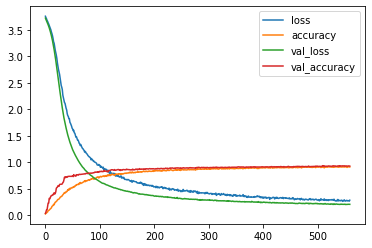

In [54]:
model_loss.plot()

In [55]:
model_loss["accuracy"].max()

0.9204180240631104

In [56]:
y_pred=np.argmax(model.predict(x_test), axis=1)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.95      0.64      0.77        28
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.97        19
           5       1.00      1.00      1.00        20
           6       0.96      1.00      0.98        24
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        14
           9       1.00      0.54      0.70        28
          10       0.94      1.00      0.97        15
          11       0.95      1.00      0.98        21
          12       1.00      1.00      1.00        20
          13       0.87      0.54      0.67        24
          14       0.89      1.00      0.94        17
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        12
          17       0.92    

In [59]:
#from keras.models import load_model
#model.save('Saved Models/classify-minerals.h5')

# REGRESSION MODEL

In [489]:
X

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.000
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.630
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.000
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.000
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3314,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3315,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3316,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987


In [492]:
X.corr()["RESERVE_AMT"].sort_values()

STATE               -0.242444
HOSTROCK_TYPE2      -0.132283
MORPH-CONCORDANT    -0.078865
HOSTROCK_TYPE3      -0.076096
MINERAL_OR          -0.063711
MORPH-SHEAR         -0.059265
MORPH-OTHER         -0.058345
MORPH-RESIDUAL      -0.055608
MORPH-BEDDED        -0.055604
MORPH-SEDIMENTARY   -0.054224
MORPH-VEIN          -0.041970
MORPH-VOLCANIC      -0.041524
MORPH-REMOBILISED   -0.037469
MORPH-MAGMATIC      -0.035511
MORPH-QUARTZ        -0.024775
MORPH-LENSOID       -0.024554
HOSTROCK_TYPE4      -0.021457
METALLOGEN           0.049762
TOPOSHEET            0.051862
LOCALITY             0.098599
HOSTROCK_TYPE1       0.111830
MORPH-STRATABOUND    0.219745
MORPH-DISCORDANT     0.460896
RESERVE_AMT          1.000000
Name: RESERVE_AMT, dtype: float64

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape
print(x_pca)

In [451]:
x = X.drop(["RESERVE_AMT"],axis=1).values
y = X["RESERVE_AMT"].values

In [452]:
x

array([[ 32,  21,   9, ...,   0,   0,   0],
       [ 94, 256,   9, ...,   0,   0,   0],
       [ 85, 247,   4, ...,   0,   0,   0],
       ...,
       [108, 124,  10, ...,   0,   0,   0],
       [ 87, 280,   8, ...,   0,   0,   0],
       [ 87, 280,   8, ...,   0,   0,   0]], dtype=int64)

In [453]:
from sklearn.model_selection import train_test_split

In [454]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# We dont fit to our test set
X_test = scaler.transform(X_test)
import tensorflow as tf
#Lets take a look at the shape of the feature data
X_train.shape

(2322, 23)

In [455]:
model = tf.keras.models.Sequential()
# No. of neurons = Size of our feature data
model.add(tf.keras.layers.Dense(23,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
# This may over fit the training data
# We will able to check it by passing the validation data along with our training data
model.add(tf.keras.layers.Dense(1))
# adam optimizer is a good opitmizer
# Since a regression problem, and we choosing a continuous label i.e price,loss = 'mse'
model.compile(optimizer='adam',loss='mse')

In [456]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode='min',verbose=1,patience=30)

In [457]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=5000,callbacks=[early_stop])

Epoch 1/5000
19/19 [==============================] - 0s 4ms/step - loss: 1536073444360192.0000 - val_loss: 839686843006976.0000
Epoch 2/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536073444360192.0000 - val_loss: 839686843006976.0000
Epoch 3/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536073712795648.0000 - val_loss: 839686843006976.0000
Epoch 4/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536073712795648.0000 - val_loss: 839686843006976.0000
Epoch 5/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536073578577920.0000 - val_loss: 839686843006976.0000
Epoch 6/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536073578577920.0000 - val_loss: 839686843006976.0000
Epoch 7/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536073578577920.0000 - val_loss: 839686843006976.0000
Epoch 8/5000
19/19 [==============================] - 0s 2ms/step - loss: 1536073444360192.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 1535535365488640.0000 - val_loss: 839387201929216.0000
Epoch 65/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535611466940416.0000 - val_loss: 839369283862528.0000
Epoch 66/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535389873471488.0000 - val_loss: 839348815659008.0000
Epoch 67/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535482886356992.0000 - val_loss: 839328414564352.0000
Epoch 68/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535443292127232.0000 - val_loss: 839307006836736.0000
Epoch 69/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535381820407808.0000 - val_loss: 839285129347072.0000
Epoch 70/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535239281180672.0000 - val_loss: 839259963523072.0000
Epoch 71/5000
19/19 [==============================] - 0s 2ms/step - loss: 1535232033423360.0000 - val_l

Epoch 127/5000
19/19 [==============================] - 0s 2ms/step - loss: 1527044752015360.0000 - val_loss: 834825141354496.0000
Epoch 128/5000
19/19 [==============================] - 0s 2ms/step - loss: 1527689131327488.0000 - val_loss: 834705352032256.0000
Epoch 129/5000
19/19 [==============================] - 0s 2ms/step - loss: 1526578479628288.0000 - val_loss: 834569725018112.0000
Epoch 130/5000
19/19 [==============================] - 0s 2ms/step - loss: 1527682688876544.0000 - val_loss: 834434903310336.0000
Epoch 131/5000
19/19 [==============================] - 0s 2ms/step - loss: 1525451184930816.0000 - val_loss: 834301960650752.0000
Epoch 132/5000
19/19 [==============================] - 0s 2ms/step - loss: 1525956648894464.0000 - val_loss: 834166937616384.0000
Epoch 133/5000
19/19 [==============================] - 0s 2ms/step - loss: 1526175558008832.0000 - val_loss: 834019029680128.0000
Epoch 134/5000
19/19 [==============================] - 0s 2ms/step - loss: 1525098

19/19 [==============================] - 0s 2ms/step - loss: 1508957168336896.0000 - val_loss: 822585759629312.0000
Epoch 190/5000
19/19 [==============================] - 0s 1ms/step - loss: 1506958397931520.0000 - val_loss: 822371883679744.0000
Epoch 191/5000
19/19 [==============================] - 0s 2ms/step - loss: 1509863674871808.0000 - val_loss: 822189146243072.0000
Epoch 192/5000
19/19 [==============================] - 0s 2ms/step - loss: 1503499338645504.0000 - val_loss: 821953124368384.0000
Epoch 193/5000
19/19 [==============================] - 0s 2ms/step - loss: 1503303514980352.0000 - val_loss: 821684487585792.0000
Epoch 194/5000
19/19 [==============================] - 0s 2ms/step - loss: 1503278953136128.0000 - val_loss: 821457659625472.0000
Epoch 195/5000
19/19 [==============================] - 0s 2ms/step - loss: 1502974144675840.0000 - val_loss: 821218550743040.0000
Epoch 196/5000
19/19 [==============================] - 0s 2ms/step - loss: 1500655936077824.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1469869207846912.0000 - val_loss: 805151816286208.0000
Epoch 252/5000
19/19 [==============================] - 0s 2ms/step - loss: 1466309619482624.0000 - val_loss: 804822311763968.0000
Epoch 253/5000
19/19 [==============================] - 0s 2ms/step - loss: 1485356054609920.0000 - val_loss: 804504618401792.0000
Epoch 254/5000
19/19 [==============================] - 0s 2ms/step - loss: 1463096983945216.0000 - val_loss: 804174778335232.0000
Epoch 255/5000
19/19 [==============================] - 0s 2ms/step - loss: 1460071984791552.0000 - val_loss: 803868694806528.0000
Epoch 256/5000
19/19 [==============================] - 0s 2ms/step - loss: 1471570954420224.0000 - val_loss: 803569791926272.0000
Epoch 257/5000
19/19 [==============================] - 0s 2ms/step - loss: 1463136309739520.0000 - val_loss: 803233240973312.0000
Epoch 258/5000
19/19 [==============================] - 0s 2ms/step - loss: 1450230738321408.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1440027640856576.0000 - val_loss: 784532752039936.0000
Epoch 314/5000
19/19 [==============================] - 0s 2ms/step - loss: 1437573201264640.0000 - val_loss: 784215796875264.0000
Epoch 315/5000
19/19 [==============================] - 0s 2ms/step - loss: 1431358383587328.0000 - val_loss: 783882534256640.0000
Epoch 316/5000
19/19 [==============================] - 0s 2ms/step - loss: 1441000182513664.0000 - val_loss: 783560277491712.0000
Epoch 317/5000
19/19 [==============================] - 0s 2ms/step - loss: 1438053298077696.0000 - val_loss: 783225941131264.0000
Epoch 318/5000
19/19 [==============================] - 0s 2ms/step - loss: 1413370523680768.0000 - val_loss: 782870197043200.0000
Epoch 319/5000
19/19 [==============================] - 0s 2ms/step - loss: 1426146843426816.0000 - val_loss: 782457276203008.0000
Epoch 320/5000
19/19 [==============================] - 0s 2ms/step - loss: 1438599698448384.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1390168036605952.0000 - val_loss: 761033643786240.0000
Epoch 376/5000
19/19 [==============================] - 0s 2ms/step - loss: 1393658502840320.0000 - val_loss: 760703333957632.0000
Epoch 377/5000
19/19 [==============================] - 0s 2ms/step - loss: 1371745579696128.0000 - val_loss: 760309136490496.0000
Epoch 378/5000
19/19 [==============================] - 0s 2ms/step - loss: 1396899324100608.0000 - val_loss: 759940708827136.0000
Epoch 379/5000
19/19 [==============================] - 0s 2ms/step - loss: 1375988873166848.0000 - val_loss: 759502018183168.0000
Epoch 380/5000
19/19 [==============================] - 0s 2ms/step - loss: 1365121800601600.0000 - val_loss: 759121578033152.0000
Epoch 381/5000
19/19 [==============================] - 0s 2ms/step - loss: 1371184818028544.0000 - val_loss: 758726373933056.0000
Epoch 382/5000
19/19 [==============================] - 0s 2ms/step - loss: 1367411018170368.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1344327045349376.0000 - val_loss: 736072501821440.0000
Epoch 438/5000
19/19 [==============================] - 0s 2ms/step - loss: 1343255987879936.0000 - val_loss: 735698369904640.0000
Epoch 439/5000
19/19 [==============================] - 0s 2ms/step - loss: 1342998558277632.0000 - val_loss: 735272295727104.0000
Epoch 440/5000
19/19 [==============================] - 0s 2ms/step - loss: 1340523180720128.0000 - val_loss: 734761597272064.0000
Epoch 441/5000
19/19 [==============================] - 0s 2ms/step - loss: 1333646938079232.0000 - val_loss: 734365185212416.0000
Epoch 442/5000
19/19 [==============================] - 0s 2ms/step - loss: 1336061246570496.0000 - val_loss: 733968840261632.0000
Epoch 443/5000
19/19 [==============================] - 0s 2ms/step - loss: 1334137772310528.0000 - val_loss: 733542564757504.0000
Epoch 444/5000
19/19 [==============================] - 0s 2ms/step - loss: 1334626995929088.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1280253783703552.0000 - val_loss: 709686571565056.0000
Epoch 500/5000
19/19 [==============================] - 0s 2ms/step - loss: 1248263256670208.0000 - val_loss: 709220903157760.0000
Epoch 501/5000
19/19 [==============================] - 0s 2ms/step - loss: 1313395630407680.0000 - val_loss: 708755972947968.0000
Epoch 502/5000
19/19 [==============================] - 0s 2ms/step - loss: 1270576953950208.0000 - val_loss: 708282989674496.0000
Epoch 503/5000
19/19 [==============================] - 0s 2ms/step - loss: 1279275470684160.0000 - val_loss: 707863022403584.0000
Epoch 504/5000
19/19 [==============================] - 0s 2ms/step - loss: 1272796109864960.0000 - val_loss: 707423459344384.0000
Epoch 505/5000
19/19 [==============================] - 0s 2ms/step - loss: 1303630888042496.0000 - val_loss: 706970273185792.0000
Epoch 506/5000
19/19 [==============================] - 0s 2ms/step - loss: 1255286333505536.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1209346423783424.0000 - val_loss: 682383330246656.0000
Epoch 562/5000
19/19 [==============================] - 0s 2ms/step - loss: 1236412368158720.0000 - val_loss: 681891288055808.0000
Epoch 563/5000
19/19 [==============================] - 0s 2ms/step - loss: 1214473675210752.0000 - val_loss: 681411392569344.0000
Epoch 564/5000
19/19 [==============================] - 0s 2ms/step - loss: 1200135329546240.0000 - val_loss: 680893379248128.0000
Epoch 565/5000
19/19 [==============================] - 0s 2ms/step - loss: 1218239556222976.0000 - val_loss: 680371272286208.0000
Epoch 566/5000
19/19 [==============================] - 0s 2ms/step - loss: 1167809929281536.0000 - val_loss: 679934796234752.0000
Epoch 567/5000
19/19 [==============================] - 0s 2ms/step - loss: 1213843254542336.0000 - val_loss: 679508319404032.0000
Epoch 568/5000
19/19 [==============================] - 0s 2ms/step - loss: 1225649985421312.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1141856247218176.0000 - val_loss: 655852310626304.0000
Epoch 624/5000
19/19 [==============================] - 0s 2ms/step - loss: 1192600883167232.0000 - val_loss: 655392547799040.0000
Epoch 625/5000
19/19 [==============================] - 0s 2ms/step - loss: 1176886940008448.0000 - val_loss: 655018415882240.0000
Epoch 626/5000
19/19 [==============================] - 0s 2ms/step - loss: 1167282587828224.0000 - val_loss: 654550935535616.0000
Epoch 627/5000
19/19 [==============================] - 0s 2ms/step - loss: 1172711426490368.0000 - val_loss: 654186467295232.0000
Epoch 628/5000
19/19 [==============================] - 0s 2ms/step - loss: 1206655492554752.0000 - val_loss: 653805758709760.0000
Epoch 629/5000
19/19 [==============================] - 0s 1ms/step - loss: 1189273759907840.0000 - val_loss: 653415050903552.0000
Epoch 630/5000
19/19 [==============================] - 0s 2ms/step - loss: 1176068882956288.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1118911458181120.0000 - val_loss: 631726539800576.0000
Epoch 686/5000
19/19 [==============================] - 0s 2ms/step - loss: 1147929733627904.0000 - val_loss: 631333281857536.0000
Epoch 687/5000
19/19 [==============================] - 0s 2ms/step - loss: 1130049650556928.0000 - val_loss: 630798222884864.0000
Epoch 688/5000
19/19 [==============================] - 0s 2ms/step - loss: 1151034994982912.0000 - val_loss: 630369464352768.0000
Epoch 689/5000
19/19 [==============================] - 0s 2ms/step - loss: 1106794348806144.0000 - val_loss: 629992044101632.0000
Epoch 690/5000
19/19 [==============================] - 0s 2ms/step - loss: 1136667524071424.0000 - val_loss: 629612610584576.0000
Epoch 691/5000
19/19 [==============================] - 0s 2ms/step - loss: 1136595583369216.0000 - val_loss: 629178282016768.0000
Epoch 692/5000
19/19 [==============================] - 0s 2ms/step - loss: 1126158275969024.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1089426843238400.0000 - val_loss: 608801145225216.0000
Epoch 748/5000
19/19 [==============================] - 0s 2ms/step - loss: 1194727294631936.0000 - val_loss: 608479760875520.0000
Epoch 749/5000
19/19 [==============================] - 0s 2ms/step - loss: 1117073950375936.0000 - val_loss: 608138713628672.0000
Epoch 750/5000
19/19 [==============================] - 0s 2ms/step - loss: 1122191538126848.0000 - val_loss: 607847192723456.0000
Epoch 751/5000
19/19 [==============================] - 0s 2ms/step - loss: 1085909667676160.0000 - val_loss: 607542652698624.0000
Epoch 752/5000
19/19 [==============================] - 0s 2ms/step - loss: 1053942024765440.0000 - val_loss: 607231267569664.0000
Epoch 753/5000
19/19 [==============================] - 0s 2ms/step - loss: 1159651102031872.0000 - val_loss: 606856800108544.0000
Epoch 754/5000
19/19 [==============================] - 0s 2ms/step - loss: 1082470137069568.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1034178866970624.0000 - val_loss: 589370713178112.0000
Epoch 810/5000
19/19 [==============================] - 0s 2ms/step - loss: 1061448620965888.0000 - val_loss: 589098049863680.0000
Epoch 811/5000
19/19 [==============================] - 0s 2ms/step - loss: 1029994025320448.0000 - val_loss: 588752506322944.0000
Epoch 812/5000
19/19 [==============================] - 0s 2ms/step - loss: 1051675758428160.0000 - val_loss: 588451925721088.0000
Epoch 813/5000
19/19 [==============================] - 0s 2ms/step - loss: 1058681722503168.0000 - val_loss: 588175571419136.0000
Epoch 814/5000
19/19 [==============================] - 0s 2ms/step - loss: 1021986796994560.0000 - val_loss: 587839423119360.0000
Epoch 815/5000
19/19 [==============================] - 0s 2ms/step - loss: 1120347654979584.0000 - val_loss: 587540184694784.0000
Epoch 816/5000
19/19 [==============================] - 0s 2ms/step - loss: 1076834535997440.0000 

Epoch 872/5000
19/19 [==============================] - 0s 2ms/step - loss: 1038161039851520.0000 - val_loss: 572398277492736.0000
Epoch 873/5000
19/19 [==============================] - 0s 2ms/step - loss: 1098347221876736.0000 - val_loss: 572204735528960.0000
Epoch 874/5000
19/19 [==============================] - 0s 2ms/step - loss: 1004035377201152.0000 - val_loss: 571945628205056.0000
Epoch 875/5000
19/19 [==============================] - 0s 2ms/step - loss: 1036292661968896.0000 - val_loss: 571713699971072.0000
Epoch 876/5000
19/19 [==============================] - 0s 2ms/step - loss: 1069440414253056.0000 - val_loss: 571537002332160.0000
Epoch 877/5000
19/19 [==============================] - 0s 2ms/step - loss: 989601065861120.0000 - val_loss: 571302456852480.0000
Epoch 878/5000
19/19 [==============================] - 0s 2ms/step - loss: 1076360680308736.0000 - val_loss: 571096231313408.0000
Epoch 879/5000
19/19 [==============================] - 0s 2ms/step - loss: 99133589

19/19 [==============================] - 0s 2ms/step - loss: 1081487260647424.0000 - val_loss: 559221854699520.0000
Epoch 935/5000
19/19 [==============================] - 0s 2ms/step - loss: 1064444226437120.0000 - val_loss: 559043009576960.0000
Epoch 936/5000
19/19 [==============================] - 0s 2ms/step - loss: 988061387194368.0000 - val_loss: 558866110611456.0000
Epoch 937/5000
19/19 [==============================] - 0s 2ms/step - loss: 977103851880448.0000 - val_loss: 558639047770112.0000
Epoch 938/5000
19/19 [==============================] - 0s 2ms/step - loss: 942247239483392.0000 - val_loss: 558423225663488.0000
Epoch 939/5000
19/19 [==============================] - 0s 2ms/step - loss: 948609159790592.0000 - val_loss: 558174721540096.0000
Epoch 940/5000
19/19 [==============================] - 0s 2ms/step - loss: 993596593405952.0000 - val_loss: 557998762098688.0000
Epoch 941/5000
19/19 [==============================] - 0s 2ms/step - loss: 1040201484861440.0000 - val

Epoch 997/5000
19/19 [==============================] - 0s 2ms/step - loss: 973711364587520.0000 - val_loss: 547216414474240.0000
Epoch 998/5000
19/19 [==============================] - 0s 2ms/step - loss: 942252004212736.0000 - val_loss: 546969353191424.0000
Epoch 999/5000
19/19 [==============================] - 0s 2ms/step - loss: 1042959793389568.0000 - val_loss: 546800406626304.0000
Epoch 1000/5000
19/19 [==============================] - 0s 2ms/step - loss: 1092345609060352.0000 - val_loss: 546709809659904.0000
Epoch 1001/5000
19/19 [==============================] - 0s 2ms/step - loss: 967398567968768.0000 - val_loss: 546555794817024.0000
Epoch 1002/5000
19/19 [==============================] - 0s 2ms/step - loss: 965218469412864.0000 - val_loss: 546371614539776.0000
Epoch 1003/5000
19/19 [==============================] - 0s 2ms/step - loss: 1034567762837504.0000 - val_loss: 546199211868160.0000
Epoch 1004/5000
19/19 [==============================] - 0s 2ms/step - loss: 100898

19/19 [==============================] - 0s 2ms/step - loss: 1002207935725568.0000 - val_loss: 536842692722688.0000
Epoch 1060/5000
19/19 [==============================] - 0s 2ms/step - loss: 1057366992748544.0000 - val_loss: 536685993525248.0000
Epoch 1061/5000
19/19 [==============================] - 0s 2ms/step - loss: 991018941939712.0000 - val_loss: 536513959952384.0000
Epoch 1062/5000
19/19 [==============================] - 0s 2ms/step - loss: 955313335304192.0000 - val_loss: 536329578348544.0000
Epoch 1063/5000
19/19 [==============================] - 0s 2ms/step - loss: 970535773143040.0000 - val_loss: 536154055114752.0000
Epoch 1064/5000
19/19 [==============================] - 0s 2ms/step - loss: 1017012285341696.0000 - val_loss: 535980545146880.0000
Epoch 1065/5000
19/19 [==============================] - 0s 2ms/step - loss: 1043476665860096.0000 - val_loss: 535804585705472.0000
Epoch 1066/5000
19/19 [==============================] - 0s 2ms/step - loss: 991522593964032.00

19/19 [==============================] - 0s 2ms/step - loss: 1034364355870720.0000 - val_loss: 526498733752320.0000
Epoch 1122/5000
19/19 [==============================] - 0s 2ms/step - loss: 953507100229632.0000 - val_loss: 526349450084352.0000
Epoch 1123/5000
19/19 [==============================] - 0s 2ms/step - loss: 925691348516864.0000 - val_loss: 526190804729856.0000
Epoch 1124/5000
19/19 [==============================] - 0s 2ms/step - loss: 968825705070592.0000 - val_loss: 526046084464640.0000
Epoch 1125/5000
19/19 [==============================] - 0s 2ms/step - loss: 928460461572096.0000 - val_loss: 525895458619392.0000
Epoch 1126/5000
19/19 [==============================] - 0s 2ms/step - loss: 918290918539264.0000 - val_loss: 525738725867520.0000
Epoch 1127/5000
19/19 [==============================] - 0s 2ms/step - loss: 992130935816192.0000 - val_loss: 525570517499904.0000
Epoch 1128/5000
19/19 [==============================] - 0s 2ms/step - loss: 1015604475592704.0000

19/19 [==============================] - 0s 2ms/step - loss: 946628173234176.0000 - val_loss: 516699665203200.0000
Epoch 1184/5000
19/19 [==============================] - 0s 2ms/step - loss: 982221439631360.0000 - val_loss: 516527866511360.0000
Epoch 1185/5000
19/19 [==============================] - 0s 2ms/step - loss: 872498312773632.0000 - val_loss: 516351202426880.0000
Epoch 1186/5000
19/19 [==============================] - 0s 2ms/step - loss: 905228245270528.0000 - val_loss: 516204166905856.0000
Epoch 1187/5000
19/19 [==============================] - 0s 2ms/step - loss: 978232555864064.0000 - val_loss: 516048742776832.0000
Epoch 1188/5000
19/19 [==============================] - 0s 2ms/step - loss: 928987266154496.0000 - val_loss: 515873789968384.0000
Epoch 1189/5000
19/19 [==============================] - 0s 2ms/step - loss: 1047003303772160.0000 - val_loss: 515734404857856.0000
Epoch 1190/5000
19/19 [==============================] - 0s 2ms/step - loss: 1023498893918208.0000

19/19 [==============================] - 0s 2ms/step - loss: 951616442204160.0000 - val_loss: 507076019224576.0000
Epoch 1246/5000
19/19 [==============================] - 0s 2ms/step - loss: 968228167745536.0000 - val_loss: 506948411719680.0000
Epoch 1247/5000
19/19 [==============================] - 0s 2ms/step - loss: 946363026112512.0000 - val_loss: 506779230273536.0000
Epoch 1248/5000
19/19 [==============================] - 0s 2ms/step - loss: 830377836937216.0000 - val_loss: 506649475284992.0000
Epoch 1249/5000
19/19 [==============================] - 0s 2ms/step - loss: 1007547586707456.0000 - val_loss: 506512707420160.0000
Epoch 1250/5000
19/19 [==============================] - 0s 2ms/step - loss: 951469540900864.0000 - val_loss: 506357820162048.0000
Epoch 1251/5000
19/19 [==============================] - 0s 2ms/step - loss: 947875995451392.0000 - val_loss: 506190148665344.0000
Epoch 1252/5000
19/19 [==============================] - 0s 2ms/step - loss: 865438057627648.0000 

19/19 [==============================] - 0s 2ms/step - loss: 932761602883584.0000 - val_loss: 497565317464064.0000
Epoch 1308/5000
19/19 [==============================] - 0s 2ms/step - loss: 1016536483495936.0000 - val_loss: 497412074373120.0000
Epoch 1309/5000
19/19 [==============================] - 0s 2ms/step - loss: 926450618204160.0000 - val_loss: 497287151222784.0000
Epoch 1310/5000
19/19 [==============================] - 0s 2ms/step - loss: 875096096899072.0000 - val_loss: 497152329515008.0000
Epoch 1311/5000
19/19 [==============================] - 0s 2ms/step - loss: 900444322791424.0000 - val_loss: 496993516388352.0000
Epoch 1312/5000
19/19 [==============================] - 0s 2ms/step - loss: 861281804353536.0000 - val_loss: 496836548755456.0000
Epoch 1313/5000
19/19 [==============================] - 0s 2ms/step - loss: 882916359929856.0000 - val_loss: 496682835902464.0000
Epoch 1314/5000
19/19 [==============================] - 0s 2ms/step - loss: 956400767336448.0000 

19/19 [==============================] - 0s 2ms/step - loss: 923660969836544.0000 - val_loss: 487641728417792.0000
Epoch 1370/5000
19/19 [==============================] - 0s 2ms/step - loss: 1005023823659008.0000 - val_loss: 487488049119232.0000
Epoch 1371/5000
19/19 [==============================] - 0s 2ms/step - loss: 964246330408960.0000 - val_loss: 487331349921792.0000
Epoch 1372/5000
19/19 [==============================] - 0s 2ms/step - loss: 935688354660352.0000 - val_loss: 487178845028352.0000
Epoch 1373/5000
19/19 [==============================] - 0s 2ms/step - loss: 857895826620416.0000 - val_loss: 487001912508416.0000
Epoch 1374/5000
19/19 [==============================] - 0s 2ms/step - loss: 972201952018432.0000 - val_loss: 486854273007616.0000
Epoch 1375/5000
19/19 [==============================] - 0s 2ms/step - loss: 886926785642496.0000 - val_loss: 486706331516928.0000
Epoch 1376/5000
19/19 [==============================] - 0s 2ms/step - loss: 843980669452288.0000 

19/19 [==============================] - 0s 2ms/step - loss: 900185081249792.0000 - val_loss: 477389138165760.0000
Epoch 1432/5000
19/19 [==============================] - 0s 2ms/step - loss: 886057054765056.0000 - val_loss: 477227439357952.0000
Epoch 1433/5000
19/19 [==============================] - 0s 2ms/step - loss: 983503890022400.0000 - val_loss: 477033394077696.0000
Epoch 1434/5000
19/19 [==============================] - 0s 2ms/step - loss: 940728096129024.0000 - val_loss: 476893539205120.0000
Epoch 1435/5000
19/19 [==============================] - 0s 2ms/step - loss: 871818499981312.0000 - val_loss: 476708184522752.0000
Epoch 1436/5000
19/19 [==============================] - 0s 2ms/step - loss: 892089470550016.0000 - val_loss: 476525480640512.0000
Epoch 1437/5000
19/19 [==============================] - 0s 2ms/step - loss: 851925486534656.0000 - val_loss: 476369217650688.0000
Epoch 1438/5000
19/19 [==============================] - 0s 2ms/step - loss: 834612876017664.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 901885686972416.0000 - val_loss: 466339630153728.0000
Epoch 1494/5000
19/19 [==============================] - 0s 2ms/step - loss: 825179047460864.0000 - val_loss: 466188668764160.0000
Epoch 1495/5000
19/19 [==============================] - 0s 2ms/step - loss: 894899587121152.0000 - val_loss: 466011534917632.0000
Epoch 1496/5000
19/19 [==============================] - 0s 2ms/step - loss: 945511750172672.0000 - val_loss: 465829602787328.0000
Epoch 1497/5000
19/19 [==============================] - 0s 2ms/step - loss: 870340293033984.0000 - val_loss: 465633779122176.0000
Epoch 1498/5000
19/19 [==============================] - 0s 2ms/step - loss: 879880891793408.0000 - val_loss: 465437854793728.0000
Epoch 1499/5000
19/19 [==============================] - 0s 2ms/step - loss: 790365854498816.0000 - val_loss: 465272163008512.0000
Epoch 1500/5000
19/19 [==============================] - 0s 2ms/step - loss: 912281386876928.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 792791504388096.0000 - val_loss: 454986521640960.0000
Epoch 1556/5000
19/19 [==============================] - 0s 2ms/step - loss: 822516570390528.0000 - val_loss: 454790194659328.0000
Epoch 1557/5000
19/19 [==============================] - 0s 2ms/step - loss: 808330561847296.0000 - val_loss: 454606081490944.0000
Epoch 1558/5000
19/19 [==============================] - 0s 2ms/step - loss: 930839537909760.0000 - val_loss: 454434517680128.0000
Epoch 1559/5000
19/19 [==============================] - 0s 2ms/step - loss: 824468633026560.0000 - val_loss: 454252015124480.0000
Epoch 1560/5000
19/19 [==============================] - 0s 2ms/step - loss: 821780386152448.0000 - val_loss: 454047198871552.0000
Epoch 1561/5000
19/19 [==============================] - 0s 2ms/step - loss: 871168013762560.0000 - val_loss: 453824699432960.0000
Epoch 1562/5000
19/19 [==============================] - 0s 2ms/step - loss: 832722754863104.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 849605801541632.0000 - val_loss: 442817704886272.0000
Epoch 1618/5000
19/19 [==============================] - 0s 2ms/step - loss: 787204154589184.0000 - val_loss: 442609935843328.0000
Epoch 1619/5000
19/19 [==============================] - 0s 2ms/step - loss: 866188938706944.0000 - val_loss: 442422836330496.0000
Epoch 1620/5000
19/19 [==============================] - 0s 2ms/step - loss: 912680751726592.0000 - val_loss: 442203189018624.0000
Epoch 1621/5000
19/19 [==============================] - 0s 2ms/step - loss: 834914127708160.0000 - val_loss: 441998943191040.0000
Epoch 1622/5000
19/19 [==============================] - 0s 2ms/step - loss: 779940224040960.0000 - val_loss: 441762988425216.0000
Epoch 1623/5000
19/19 [==============================] - 0s 2ms/step - loss: 826532901683200.0000 - val_loss: 441551360622592.0000
Epoch 1624/5000
19/19 [==============================] - 0s 2ms/step - loss: 736814792966144.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 863055894282240.0000 - val_loss: 429974544711680.0000
Epoch 1680/5000
19/19 [==============================] - 0s 2ms/step - loss: 839075749691392.0000 - val_loss: 429760568098816.0000
Epoch 1681/5000
19/19 [==============================] - 0s 2ms/step - loss: 925236618854400.0000 - val_loss: 429549879820288.0000
Epoch 1682/5000
19/19 [==============================] - 0s 2ms/step - loss: 734237544153088.0000 - val_loss: 429353821274112.0000
Epoch 1683/5000
19/19 [==============================] - 0s 2ms/step - loss: 680885393293312.0000 - val_loss: 429120013991936.0000
Epoch 1684/5000
19/19 [==============================] - 0s 2ms/step - loss: 808426728849408.0000 - val_loss: 428916774797312.0000
Epoch 1685/5000
19/19 [==============================] - 0s 2ms/step - loss: 816424763260928.0000 - val_loss: 428711522336768.0000
Epoch 1686/5000
19/19 [==============================] - 0s 2ms/step - loss: 783823344238592.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 853305177669632.0000 - val_loss: 416395468734464.0000
Epoch 1742/5000
19/19 [==============================] - 0s 2ms/step - loss: 874388165492736.0000 - val_loss: 416212295090176.0000
Epoch 1743/5000
19/19 [==============================] - 0s 2ms/step - loss: 785545626124288.0000 - val_loss: 416069822971904.0000
Epoch 1744/5000
19/19 [==============================] - 0s 2ms/step - loss: 787874840576000.0000 - val_loss: 415710153015296.0000
Epoch 1745/5000
19/19 [==============================] - 0s 2ms/step - loss: 808809182265344.0000 - val_loss: 415504162357248.0000
Epoch 1746/5000
19/19 [==============================] - 0s 2ms/step - loss: 827152584933376.0000 - val_loss: 415295353126912.0000
Epoch 1747/5000
19/19 [==============================] - 0s 2ms/step - loss: 841395770228736.0000 - val_loss: 415054700740608.0000
Epoch 1748/5000
19/19 [==============================] - 0s 2ms/step - loss: 768965643075584.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 809697770733568.0000 - val_loss: 402112924090368.0000
Epoch 1804/5000
19/19 [==============================] - 0s 2ms/step - loss: 908926883201024.0000 - val_loss: 401924918607872.0000
Epoch 1805/5000
19/19 [==============================] - 0s 2ms/step - loss: 848319593054208.0000 - val_loss: 401673226813440.0000
Epoch 1806/5000
19/19 [==============================] - 0s 2ms/step - loss: 810929688150016.0000 - val_loss: 401444721131520.0000
Epoch 1807/5000
19/19 [==============================] - 0s 2ms/step - loss: 789607054573568.0000 - val_loss: 401237891612672.0000
Epoch 1808/5000
19/19 [==============================] - 0s 2ms/step - loss: 802896555802624.0000 - val_loss: 401034853744640.0000
Epoch 1809/5000
19/19 [==============================] - 0s 2ms/step - loss: 785823859474432.0000 - val_loss: 400810341040128.0000
Epoch 1810/5000
19/19 [==============================] - 0s 2ms/step - loss: 822209748664320.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 734879574654976.0000 - val_loss: 387366556532736.0000
Epoch 1866/5000
19/19 [==============================] - 0s 2ms/step - loss: 646582294806528.0000 - val_loss: 387107516317696.0000
Epoch 1867/5000
19/19 [==============================] - 0s 2ms/step - loss: 762509569032192.0000 - val_loss: 386847737905152.0000
Epoch 1868/5000
19/19 [==============================] - 0s 2ms/step - loss: 761967530737664.0000 - val_loss: 386662483886080.0000
Epoch 1869/5000
19/19 [==============================] - 0s 2ms/step - loss: 684624229433344.0000 - val_loss: 386425421824000.0000
Epoch 1870/5000
19/19 [==============================] - 0s 2ms/step - loss: 737567955746816.0000 - val_loss: 386201714425856.0000
Epoch 1871/5000
19/19 [==============================] - 0s 2ms/step - loss: 728946010226688.0000 - val_loss: 385905663672320.0000
Epoch 1872/5000
19/19 [==============================] - 0s 2ms/step - loss: 749778010898432.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 762408033320960.0000 - val_loss: 372636328656896.0000
Epoch 1928/5000
19/19 [==============================] - 0s 2ms/step - loss: 658192933584896.0000 - val_loss: 372444833513472.0000
Epoch 1929/5000
19/19 [==============================] - 0s 2ms/step - loss: 771841861877760.0000 - val_loss: 372245620850688.0000
Epoch 1930/5000
19/19 [==============================] - 0s 2ms/step - loss: 741987074441216.0000 - val_loss: 372056977833984.0000
Epoch 1931/5000
19/19 [==============================] - 0s 2ms/step - loss: 727146620256256.0000 - val_loss: 371834612613120.0000
Epoch 1932/5000
19/19 [==============================] - 0s 2ms/step - loss: 663354813186048.0000 - val_loss: 371674960625664.0000
Epoch 1933/5000
19/19 [==============================] - 0s 2ms/step - loss: 698813190766592.0000 - val_loss: 371394512683008.0000
Epoch 1934/5000
19/19 [==============================] - 0s 2ms/step - loss: 687981417463808.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 686574547238912.0000 - val_loss: 357240716394496.0000
Epoch 1990/5000
19/19 [==============================] - 0s 2ms/step - loss: 760692126777344.0000 - val_loss: 357010264555520.0000
Epoch 1991/5000
19/19 [==============================] - 0s 2ms/step - loss: 670443656708096.0000 - val_loss: 356819172065280.0000
Epoch 1992/5000
19/19 [==============================] - 0s 2ms/step - loss: 757734303596544.0000 - val_loss: 356538891894784.0000
Epoch 1993/5000
19/19 [==============================] - 0s 2ms/step - loss: 679487045894144.0000 - val_loss: 356215997595648.0000
Epoch 1994/5000
19/19 [==============================] - 0s 2ms/step - loss: 826178902425600.0000 - val_loss: 355961587892224.0000
Epoch 1995/5000
19/19 [==============================] - 0s 2ms/step - loss: 731067522744320.0000 - val_loss: 355680603078656.0000
Epoch 1996/5000
19/19 [==============================] - 0s 2ms/step - loss: 671577528074240.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 703692743376896.0000 - val_loss: 341706557882368.0000
Epoch 2052/5000
19/19 [==============================] - 0s 2ms/step - loss: 727006899601408.0000 - val_loss: 341410708455424.0000
Epoch 2053/5000
19/19 [==============================] - 0s 2ms/step - loss: 670752290373632.0000 - val_loss: 341095967883264.0000
Epoch 2054/5000
19/19 [==============================] - 0s 2ms/step - loss: 643707149746176.0000 - val_loss: 340904908947456.0000
Epoch 2055/5000
19/19 [==============================] - 0s 2ms/step - loss: 606728622178304.0000 - val_loss: 340705293631488.0000
Epoch 2056/5000
19/19 [==============================] - 0s 2ms/step - loss: 748361879650304.0000 - val_loss: 340293446533120.0000
Epoch 2057/5000
19/19 [==============================] - 0s 2ms/step - loss: 654254045921280.0000 - val_loss: 340060377448448.0000
Epoch 2058/5000
19/19 [==============================] - 0s 2ms/step - loss: 658762218078208.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 766998212509696.0000 - val_loss: 326026034937856.0000
Epoch 2114/5000
19/19 [==============================] - 0s 2ms/step - loss: 651712633241600.0000 - val_loss: 325760552271872.0000
Epoch 2115/5000
19/19 [==============================] - 0s 2ms/step - loss: 649673396191232.0000 - val_loss: 325537012645888.0000
Epoch 2116/5000
19/19 [==============================] - 0s 2ms/step - loss: 711957132869632.0000 - val_loss: 325225258418176.0000
Epoch 2117/5000
19/19 [==============================] - 0s 2ms/step - loss: 609437203038208.0000 - val_loss: 324965983322112.0000
Epoch 2118/5000
19/19 [==============================] - 0s 2ms/step - loss: 624302286176256.0000 - val_loss: 324683085905920.0000
Epoch 2119/5000
19/19 [==============================] - 0s 2ms/step - loss: 633450432299008.0000 - val_loss: 324484644995072.0000
Epoch 2120/5000
19/19 [==============================] - 0s 2ms/step - loss: 552403426344960.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 627721818341376.0000 - val_loss: 309804044124160.0000
Epoch 2176/5000
19/19 [==============================] - 0s 2ms/step - loss: 640042401792000.0000 - val_loss: 309613119406080.0000
Epoch 2177/5000
19/19 [==============================] - 0s 2ms/step - loss: 646022808207360.0000 - val_loss: 309396928200704.0000
Epoch 2178/5000
19/19 [==============================] - 0s 2ms/step - loss: 679799437656064.0000 - val_loss: 309215298060288.0000
Epoch 2179/5000
19/19 [==============================] - 0s 2ms/step - loss: 662005186822144.0000 - val_loss: 308866533294080.0000
Epoch 2180/5000
19/19 [==============================] - 0s 2ms/step - loss: 684241574690816.0000 - val_loss: 308715169251328.0000
Epoch 2181/5000
19/19 [==============================] - 0s 2ms/step - loss: 695156831420416.0000 - val_loss: 308367545335808.0000
Epoch 2182/5000
19/19 [==============================] - 0s 2ms/step - loss: 611079759593472.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 665865892659200.0000 - val_loss: 293997322960896.0000
Epoch 2238/5000
19/19 [==============================] - 0s 2ms/step - loss: 597337273532416.0000 - val_loss: 293645773176832.0000
Epoch 2239/5000
19/19 [==============================] - 0s 2ms/step - loss: 693600442646528.0000 - val_loss: 293328180477952.0000
Epoch 2240/5000
19/19 [==============================] - 0s 2ms/step - loss: 543732424245248.0000 - val_loss: 293056993558528.0000
Epoch 2241/5000
19/19 [==============================] - 0s 2ms/step - loss: 680822914940928.0000 - val_loss: 292781746552832.0000
Epoch 2242/5000
19/19 [==============================] - 0s 2ms/step - loss: 676117644050432.0000 - val_loss: 292649172992000.0000
Epoch 2243/5000
19/19 [==============================] - 0s 2ms/step - loss: 594388174503936.0000 - val_loss: 292435095715840.0000
Epoch 2244/5000
19/19 [==============================] - 0s 2ms/step - loss: 627517337632768.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 569236778909696.0000 - val_loss: 277450525245440.0000
Epoch 2300/5000
19/19 [==============================] - 0s 2ms/step - loss: 589892551704576.0000 - val_loss: 277182123343872.0000
Epoch 2301/5000
19/19 [==============================] - 0s 2ms/step - loss: 550499715645440.0000 - val_loss: 276911490072576.0000
Epoch 2302/5000
19/19 [==============================] - 0s 2ms/step - loss: 668648763031552.0000 - val_loss: 276594115477504.0000
Epoch 2303/5000
19/19 [==============================] - 0s 2ms/step - loss: 642753935441920.0000 - val_loss: 276404046397440.0000
Epoch 2304/5000
19/19 [==============================] - 0s 2ms/step - loss: 613306901463040.0000 - val_loss: 276124823191552.0000
Epoch 2305/5000
19/19 [==============================] - 0s 2ms/step - loss: 756716195020800.0000 - val_loss: 275852277317632.0000
Epoch 2306/5000
19/19 [==============================] - 0s 2ms/step - loss: 699473005117440.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 610620466528256.0000 - val_loss: 261703161872384.0000
Epoch 2362/5000
19/19 [==============================] - 0s 2ms/step - loss: 531366408093696.0000 - val_loss: 261353474359296.0000
Epoch 2363/5000
19/19 [==============================] - 0s 2ms/step - loss: 534247391625216.0000 - val_loss: 260962397454336.0000
Epoch 2364/5000
19/19 [==============================] - 0s 2ms/step - loss: 544482231582720.0000 - val_loss: 260599858593792.0000
Epoch 2365/5000
19/19 [==============================] - 0s 2ms/step - loss: 497264904634368.0000 - val_loss: 260295452786688.0000
Epoch 2366/5000
19/19 [==============================] - 0s 2ms/step - loss: 604892121006080.0000 - val_loss: 259997673979904.0000
Epoch 2367/5000
19/19 [==============================] - 0s 2ms/step - loss: 544134439895040.0000 - val_loss: 259692915851264.0000
Epoch 2368/5000
19/19 [==============================] - 0s 2ms/step - loss: 599479187144704.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 546340610244608.0000 - val_loss: 246209000243200.0000
Epoch 2424/5000
19/19 [==============================] - 0s 2ms/step - loss: 572715098439680.0000 - val_loss: 246052653367296.0000
Epoch 2425/5000
19/19 [==============================] - 0s 2ms/step - loss: 629191301136384.0000 - val_loss: 245886978359296.0000
Epoch 2426/5000
19/19 [==============================] - 0s 2ms/step - loss: 595425006452736.0000 - val_loss: 245620925267968.0000
Epoch 2427/5000
19/19 [==============================] - 0s 2ms/step - loss: 600461660913664.0000 - val_loss: 245445083267072.0000
Epoch 2428/5000
19/19 [==============================] - 0s 2ms/step - loss: 645942478897152.0000 - val_loss: 245326820671488.0000
Epoch 2429/5000
19/19 [==============================] - 0s 2ms/step - loss: 611339202461696.0000 - val_loss: 245156599037952.0000
Epoch 2430/5000
19/19 [==============================] - 0s 2ms/step - loss: 546308129554432.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 580999956135936.0000 - val_loss: 234285902594048.0000
Epoch 2486/5000
19/19 [==============================] - 0s 2ms/step - loss: 535566617673728.0000 - val_loss: 234141702422528.0000
Epoch 2487/5000
19/19 [==============================] - 0s 2ms/step - loss: 663461650497536.0000 - val_loss: 233847178395648.0000
Epoch 2488/5000
19/19 [==============================] - 0s 2ms/step - loss: 735977878323200.0000 - val_loss: 233727657508864.0000
Epoch 2489/5000
19/19 [==============================] - 0s 2ms/step - loss: 526113763753984.0000 - val_loss: 233525005516800.0000
Epoch 2490/5000
19/19 [==============================] - 0s 2ms/step - loss: 611419800207360.0000 - val_loss: 233330188484608.0000
Epoch 2491/5000
19/19 [==============================] - 0s 2ms/step - loss: 528557835026432.0000 - val_loss: 233196507627520.0000
Epoch 2492/5000
19/19 [==============================] - 0s 2ms/step - loss: 624918546874368.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 616908365758464.0000 - val_loss: 223456729759744.0000
Epoch 2548/5000
19/19 [==============================] - 0s 2ms/step - loss: 527438022967296.0000 - val_loss: 223065183092736.0000
Epoch 2549/5000
19/19 [==============================] - 0s 2ms/step - loss: 473807068332032.0000 - val_loss: 222779332886528.0000
Epoch 2550/5000
19/19 [==============================] - 0s 2ms/step - loss: 544766571839488.0000 - val_loss: 222432564609024.0000
Epoch 2551/5000
19/19 [==============================] - 0s 2ms/step - loss: 528213063237632.0000 - val_loss: 222201039028224.0000
Epoch 2552/5000
19/19 [==============================] - 0s 2ms/step - loss: 615379223183360.0000 - val_loss: 222244441686016.0000
Epoch 2553/5000
19/19 [==============================] - 0s 2ms/step - loss: 494718089691136.0000 - val_loss: 222107556380672.0000
Epoch 2554/5000
19/19 [==============================] - 0s 2ms/step - loss: 589493992161280.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 464353073561600.0000 - val_loss: 211745796784128.0000
Epoch 2610/5000
19/19 [==============================] - 0s 2ms/step - loss: 596505861816320.0000 - val_loss: 211586715222016.0000
Epoch 2611/5000
19/19 [==============================] - 0s 2ms/step - loss: 602653637738496.0000 - val_loss: 211493433901056.0000
Epoch 2612/5000
19/19 [==============================] - 0s 2ms/step - loss: 573677707984896.0000 - val_loss: 211385975832576.0000
Epoch 2613/5000
19/19 [==============================] - 0s 2ms/step - loss: 495158021849088.0000 - val_loss: 210986560651264.0000
Epoch 2614/5000
19/19 [==============================] - 0s 2ms/step - loss: 541450521542656.0000 - val_loss: 210650731118592.0000
Epoch 2615/5000
19/19 [==============================] - 0s 2ms/step - loss: 555994958528512.0000 - val_loss: 210574260568064.0000
Epoch 2616/5000
19/19 [==============================] - 0s 2ms/step - loss: 674195377750016.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 511207375110144.0000 - val_loss: 204074347659264.0000
Epoch 2672/5000
19/19 [==============================] - 0s 2ms/step - loss: 551112386019328.0000 - val_loss: 203919594618880.0000
Epoch 2673/5000
19/19 [==============================] - 0s 2ms/step - loss: 493883456749568.0000 - val_loss: 203880856027136.0000
Epoch 2674/5000
19/19 [==============================] - 0s 2ms/step - loss: 429427171262464.0000 - val_loss: 203610323419136.0000
Epoch 2675/5000
19/19 [==============================] - 0s 2ms/step - loss: 545295624568832.0000 - val_loss: 203647786942464.0000
Epoch 2676/5000
19/19 [==============================] - 0s 2ms/step - loss: 576678011076608.0000 - val_loss: 203588764696576.0000
Epoch 2677/5000
19/19 [==============================] - 0s 2ms/step - loss: 487985057366016.0000 - val_loss: 203487195430912.0000
Epoch 2678/5000
19/19 [==============================] - 0s 2ms/step - loss: 468410408370176.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 514686734827520.0000 - val_loss: 196370283626496.0000
Epoch 2734/5000
19/19 [==============================] - 0s 2ms/step - loss: 529365825748992.0000 - val_loss: 196229791219712.0000
Epoch 2735/5000
19/19 [==============================] - 0s 2ms/step - loss: 499296289947648.0000 - val_loss: 196117031550976.0000
Epoch 2736/5000
19/19 [==============================] - 0s 2ms/step - loss: 548743912882176.0000 - val_loss: 196141224296448.0000
Epoch 2737/5000
19/19 [==============================] - 0s 2ms/step - loss: 522949715034112.0000 - val_loss: 195964610543616.0000
Epoch 2738/5000
19/19 [==============================] - 0s 2ms/step - loss: 537928010825728.0000 - val_loss: 195793164173312.0000
Epoch 2739/5000
19/19 [==============================] - 0s 2ms/step - loss: 503210649321472.0000 - val_loss: 195652470439936.0000
Epoch 2740/5000
19/19 [==============================] - 0s 2ms/step - loss: 495572721074176.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 494504045969408.0000 - val_loss: 190865393844224.0000
Epoch 2796/5000
19/19 [==============================] - 0s 2ms/step - loss: 543881741467648.0000 - val_loss: 190702956838912.0000
Epoch 2797/5000
19/19 [==============================] - 0s 2ms/step - loss: 476572557508608.0000 - val_loss: 191003118010368.0000
Epoch 2798/5000
19/19 [==============================] - 0s 2ms/step - loss: 484101433851904.0000 - val_loss: 190826554589184.0000
Epoch 2799/5000
19/19 [==============================] - 0s 2ms/step - loss: 526135842570240.0000 - val_loss: 190738155438080.0000
Epoch 2800/5000
19/19 [==============================] - 0s 2ms/step - loss: 553655073767424.0000 - val_loss: 190739128516608.0000
Epoch 2801/5000
19/19 [==============================] - 0s 2ms/step - loss: 517424944250880.0000 - val_loss: 190891448860672.0000
Epoch 2802/5000
19/19 [==============================] - 0s 2ms/step - loss: 487518382325760.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 556691984744448.0000 - val_loss: 183098666909696.0000
Epoch 2858/5000
19/19 [==============================] - 0s 2ms/step - loss: 551121445715968.0000 - val_loss: 182754918531072.0000
Epoch 2859/5000
19/19 [==============================] - 0s 2ms/step - loss: 570587277688832.0000 - val_loss: 182633820585984.0000
Epoch 2860/5000
19/19 [==============================] - 0s 2ms/step - loss: 446373770035200.0000 - val_loss: 182720743342080.0000
Epoch 2861/5000
19/19 [==============================] - 0s 2ms/step - loss: 575556487741440.0000 - val_loss: 182456250531840.0000
Epoch 2862/5000
19/19 [==============================] - 0s 2ms/step - loss: 530033491836928.0000 - val_loss: 182055560282112.0000
Epoch 2863/5000
19/19 [==============================] - 0s 2ms/step - loss: 534610786123776.0000 - val_loss: 181739544641536.0000
Epoch 2864/5000
19/19 [==============================] - 0s 2ms/step - loss: 621210245267456.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 493709107920896.0000 - val_loss: 175616598999040.0000
Epoch 2920/5000
19/19 [==============================] - 0s 2ms/step - loss: 534359798972416.0000 - val_loss: 175660135874560.0000
Epoch 2921/5000
19/19 [==============================] - 0s 2ms/step - loss: 575639635623936.0000 - val_loss: 175931356348416.0000
Epoch 2922/5000
19/19 [==============================] - 0s 2ms/step - loss: 549176328847360.0000 - val_loss: 175871210029056.0000
Epoch 2923/5000
19/19 [==============================] - 0s 2ms/step - loss: 492387533062144.0000 - val_loss: 175531823726592.0000
Epoch 2924/5000
19/19 [==============================] - 0s 2ms/step - loss: 436824514232320.0000 - val_loss: 175397874434048.0000
Epoch 2925/5000
19/19 [==============================] - 0s 2ms/step - loss: 625497495044096.0000 - val_loss: 175670034432000.0000
Epoch 2926/5000
19/19 [==============================] - 0s 2ms/step - loss: 429663629344768.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 528432106569728.0000 - val_loss: 174299117780992.0000
Epoch 2982/5000
19/19 [==============================] - 0s 2ms/step - loss: 514157245890560.0000 - val_loss: 174155756470272.0000
Epoch 2983/5000
19/19 [==============================] - 0s 2ms/step - loss: 541199333064704.0000 - val_loss: 174279287111680.0000
Epoch 2984/5000
19/19 [==============================] - 0s 2ms/step - loss: 477790314954752.0000 - val_loss: 174144683507712.0000
Epoch 2985/5000
19/19 [==============================] - 0s 2ms/step - loss: 562665076293632.0000 - val_loss: 173957063901184.0000
Epoch 2986/5000
19/19 [==============================] - 0s 2ms/step - loss: 490536569929728.0000 - val_loss: 173818400210944.0000
Epoch 2987/5000
19/19 [==============================] - 0s 2ms/step - loss: 548917020196864.0000 - val_loss: 173799123189760.0000
Epoch 2988/5000
19/19 [==============================] - 0s 2ms/step - loss: 405828943216640.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 516493104119808.0000 - val_loss: 168894287314944.0000
Epoch 3044/5000
19/19 [==============================] - 0s 2ms/step - loss: 511900609675264.0000 - val_loss: 169093701304320.0000
Epoch 3045/5000
19/19 [==============================] - 0s 2ms/step - loss: 511595734106112.0000 - val_loss: 169107911606272.0000
Epoch 3046/5000
19/19 [==============================] - 0s 2ms/step - loss: 594537089073152.0000 - val_loss: 168962922905600.0000
Epoch 3047/5000
19/19 [==============================] - 0s 2ms/step - loss: 570593451704320.0000 - val_loss: 169288484782080.0000
Epoch 3048/5000
19/19 [==============================] - 0s 2ms/step - loss: 517337736282112.0000 - val_loss: 169013137113088.0000
Epoch 3049/5000
19/19 [==============================] - 0s 2ms/step - loss: 480041112698880.0000 - val_loss: 168846421917696.0000
Epoch 3050/5000
19/19 [==============================] - 0s 2ms/step - loss: 581890222325760.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 446552413831168.0000 - val_loss: 164531154190336.0000
Epoch 3106/5000
19/19 [==============================] - 0s 2ms/step - loss: 426959007907840.0000 - val_loss: 164241914986496.0000
Epoch 3107/5000
19/19 [==============================] - 0s 2ms/step - loss: 446443227709440.0000 - val_loss: 163844815060992.0000
Epoch 3108/5000
19/19 [==============================] - 0s 2ms/step - loss: 488044952027136.0000 - val_loss: 163433773268992.0000
Epoch 3109/5000
19/19 [==============================] - 0s 2ms/step - loss: 559303425523712.0000 - val_loss: 163313145085952.0000
Epoch 3110/5000
19/19 [==============================] - 0s 2ms/step - loss: 480262907494400.0000 - val_loss: 163146496999424.0000
Epoch 3111/5000
19/19 [==============================] - 0s 2ms/step - loss: 489428501921792.0000 - val_loss: 163156747878400.0000
Epoch 3112/5000
19/19 [==============================] - 0s 2ms/step - loss: 491545081937920.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 439292576923648.0000 - val_loss: 161954308030464.0000
Epoch 3168/5000
19/19 [==============================] - 0s 2ms/step - loss: 524395374182400.0000 - val_loss: 161929075097600.0000
Epoch 3169/5000
19/19 [==============================] - 0s 2ms/step - loss: 471318470328320.0000 - val_loss: 161804755927040.0000
Epoch 3170/5000
19/19 [==============================] - 0s 2ms/step - loss: 479910753730560.0000 - val_loss: 161597456646144.0000
Epoch 3171/5000
19/19 [==============================] - 0s 2ms/step - loss: 466918611877888.0000 - val_loss: 161356468715520.0000
Epoch 3172/5000
19/19 [==============================] - 0s 2ms/step - loss: 446180798496768.0000 - val_loss: 161100700057600.0000
Epoch 3173/5000
19/19 [==============================] - 0s 2ms/step - loss: 542507117051904.0000 - val_loss: 160980709408768.0000
Epoch 3174/5000
19/19 [==============================] - 0s 2ms/step - loss: 503666519834624.0000 -

In [458]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,1.536073e+15,8.396868e+14
1,1.536073e+15,8.396868e+14
2,1.536074e+15,8.396868e+14
3,1.536074e+15,8.396868e+14
4,1.536074e+15,8.396868e+14
...,...,...
3174,4.521680e+14,1.608177e+14
3175,5.031266e+14,1.606190e+14
3176,5.266201e+14,1.606021e+14
3177,4.470722e+14,1.605699e+14


<AxesSubplot:>

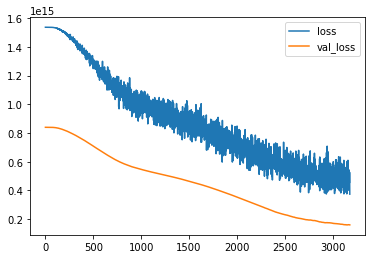

In [459]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [460]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [461]:
predictions = model.predict(X_test)

In [463]:
predictions

array([[2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [1.5498797e+08],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [1.5498797e+08],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.9248446e+01],
       [2.924844

In [464]:
np.sqrt(mean_squared_error(y_test,predictions))

12668728.871648248

In [465]:
mean_absolute_error(y_test,predictions)

1856982.6382490958

In [466]:
X['RESERVE_AMT'].describe()

count    3.318000e+03
mean     5.784510e+06
std      3.597167e+07
min      5.800000e-02
25%      2.150000e+00
50%      3.902700e+01
75%      3.814600e+04
max      2.360000e+08
Name: RESERVE_AMT, dtype: float64

In [467]:
1610640/5784258.0

0.27845230969987855

In [468]:
# Best possible score is 1.0, lower values are worse.
explained_variance_score(y_test,predictions)

0.806659492115864

In [469]:
model.save('Saved Models/calculate-mineral.h5')

## LOADING THE SAVED MODEL

In [470]:
from keras.models import load_model
model_final = load_model('Saved Models/calculate-mineral.h5')

In [483]:
inputs = X_test[10]

In [484]:
inputs

array([0.23148148, 0.48993289, 0.90909091, 0.07936508, 0.56097561,
       0.6984127 , 0.69863014, 0.55555556, 0.41176471, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        ])

In [485]:
inputs.shape

(23,)

In [486]:
inputs=inputs.reshape(1,-1)

In [487]:
prediction = model_final.predict(inputs)

In [488]:
print(prediction)

[[29.248446]]


In [85]:
prediction.argmax()

12

In [86]:
y_pred=np.argmax(prediction, axis=1)
y_pred

array([12], dtype=int64)

In [87]:
prediction.max()

0.9984888